In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv('csv/prelim_datasets/gameandgrade.csv')
df["Grade"] = df["Grade"].str.replace("..", ".", regex=False)
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")
df = df[(df["Grade"] >= 75.00) & (df["Grade"] <= 100)]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               465 non-null    int64  
 1   School Code       465 non-null    int64  
 2   Playing Years     465 non-null    int64  
 3   Playing Often     465 non-null    int64  
 4   Playing Hours     465 non-null    int64  
 5   Playing Games     465 non-null    int64  
 6   Parent Revenue    465 non-null    int64  
 7   Father Education  465 non-null    int64  
 8   Mother Education  465 non-null    int64  
 9   Grade             465 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 40.0 KB


In [21]:
ordinal_columns = ["Playing Years", "Playing Often", "Playing Hours", "Playing Games"]
encoder = LabelEncoder()

for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [22]:
df = pd.get_dummies(df, columns=["Sex", "School Code", "Parent Revenue", "Father Education", 
                                 "Mother Education"], drop_first=True)

In [23]:
X = df.drop(columns=["Grade"])
Y = df["Grade"]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
print(f"Intercept (b): {model.intercept_:2f}")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Intercept (b): 93.582026
                    Coefficient
Playing Years          0.041523
Playing Often          0.462540
Playing Hours         -0.029799
Playing Games         -2.170272
Sex_1                 -0.387565
School Code_2          0.251508
School Code_3         -1.545673
School Code_4         -1.340186
School Code_5          6.417974
School Code_6          9.311466
School Code_7         12.231112
School Code_8         -1.006881
School Code_9         11.427360
School Code_10         0.214623
School Code_11        -1.755720
Parent Revenue_1       1.595920
Parent Revenue_2       2.800254
Parent Revenue_3       3.150282
Parent Revenue_4       2.916472
Father Education_1    -9.231819
Father Education_2    -3.171390
Father Education_3    -4.025528
Father Education_4    -3.163576
Father Education_5    -3.098781
Father Education_6    -1.533272
Mother Education_1    -4.940076
Mother Education_2    -6.763850
Mother Education_3    -7.401140
Mother Education_4    -5.502277
Mother Educatio

In [27]:
Y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 50.84
R² Score: 0.36


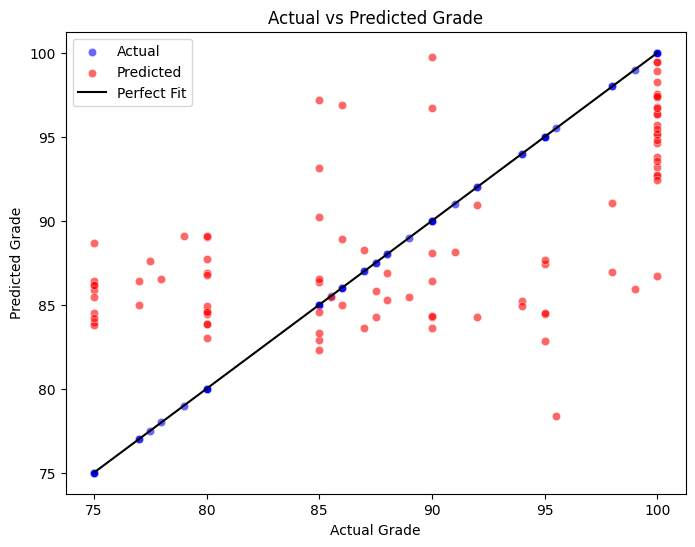

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted", alpha=0.6)

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black", linestyle="-", label="Perfect Fit")

plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Actual vs Predicted Grade")
plt.legend()
plt.show()